In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings



Import the CSV Data as Pandas DataFrame

In [3]:
df= pd.read_csv('C:\\projects\\mlproject\\notebook\\data\\StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
x=df.drop(columns=['math score'],axis=1)
y=df['math score']

In [6]:
# create a column data type transformer with 3 types of transformers
num_features= x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=   StandardScaler()
oh_trasformer= OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_trasformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)


In [7]:
x= preprocessor.fit_transform(x)

In [8]:
x.shape

(1000, 19)

In [9]:
# separate the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

Creat an Evaluate Function to give all metrics after model training

In [10]:
def evaluate_model(true,predicted):
    MAE= mean_absolute_error(true,predicted)
    MSE= mean_squared_error(true,predicted)
    RMSE= np.sqrt(mean_squared_error(true,predicted))
    R2_SQUARE= r2_score(true, predicted)
    return MAE, MSE,R2_SQUARE,RMSE

In [11]:
models={ 
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbours Regressor": KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()


}
model_list= []
r2_list= []
for i in range(len(list(models))):
    model= list(models.values())[i]
    model.fit(X_train,y_train) # train the model

    y_train_predict= model.predict(X_train)
    y_test_predict= model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_MAE,model_train_MSE,model_train_R2_SQUARE,model_train_RMSE= evaluate_model(y_train,y_train_predict)
    model_test_MAE,model_test_MSE,model_test_R2_SQUARE,model_test_RMSE= evaluate_model(y_test, y_test_predict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for training set')
    print('Mean Squared Error:{:.4f}'.format(model_train_MSE))
    print('Root Mean Squared Error:{:.4f}'.format(model_train_RMSE))
    print('Mean Absolute Error{:.4f}'.format(model_train_MAE))
    print("R2 Score:{:.4f}".format(model_train_R2_SQUARE))

    print('---------------------------')

    print('Model Performance for Test set')
    print('Mean Squared Error:{:.4f}'.format(model_test_MSE))
    print('Root Mean Squared Error:{:.4f}'.format(model_test_RMSE))
    print('Mean Absolute Error{:.4f}'.format(model_test_MAE))
    print("R2 Score:{:.4f}".format(model_test_R2_SQUARE))
    r2_list.append(model_test_R2_SQUARE)

    print('='*35)
    print('\n')





LinearRegression
Model Performance for training set
Mean Squared Error:28.3349
Root Mean Squared Error:5.3231
Mean Absolute Error4.2667
R2 Score:0.8743
---------------------------
Model Performance for Test set
Mean Squared Error:29.0952
Root Mean Squared Error:5.3940
Mean Absolute Error4.2148
R2 Score:0.8804


Lasso
Model Performance for training set
Mean Squared Error:43.4784
Root Mean Squared Error:6.5938
Mean Absolute Error5.2063
R2 Score:0.8071
---------------------------
Model Performance for Test set
Mean Squared Error:42.5064
Root Mean Squared Error:6.5197
Mean Absolute Error5.1579
R2 Score:0.8253


Ridge
Model Performance for training set
Mean Squared Error:28.3378
Root Mean Squared Error:5.3233
Mean Absolute Error4.2650
R2 Score:0.8743
---------------------------
Model Performance for Test set
Mean Squared Error:29.0563
Root Mean Squared Error:5.3904
Mean Absolute Error4.2111
R2 Score:0.8806


K-Neighbours Regressor
Model Performance for training set
Mean Squared Error:32.593

In [13]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score',]).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850881
8,AdaBoost Regressor,0.846455
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbours Regressor,0.783497
4,Decision Tree,0.753820


Linear Regression

In [16]:
lin_model= LinearRegression(fit_intercept=True)
lin_model= lin_model.fit(X_train,y_train)
y_pred= lin_model.predict(X_test)
score= r2_score(y_test,y_pred)*100
print("Accuracy of the model is:%.2f"%score)

Accuracy of the model is:88.04


Plot y_pred an y_test

Text(0, 0.5, 'Predicted')

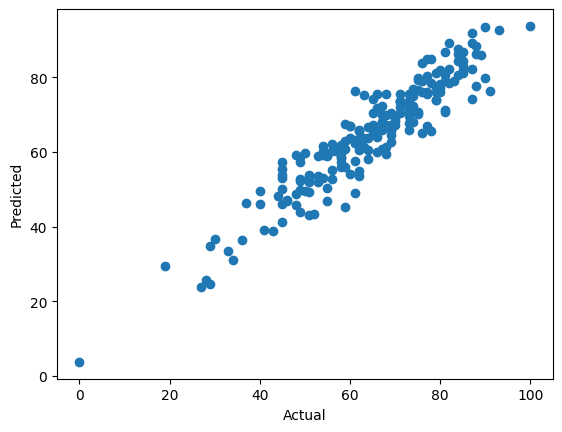

In [17]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

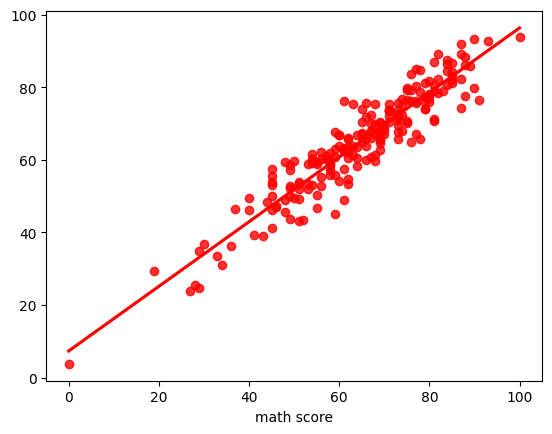

In [19]:
sns.regplot(x=y_test, y= y_pred, ci=None,color='red')

In [21]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
